In [1]:
import keras
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, InputLayer
from keras.optimizers import Adam
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/Users/riccardo/Desktop/Repositorys_Github/Training/Dataset/wage.csv', sep=";", index_col=False).round(2)
df 

,wage,educ,exper,metro
0,2.07,12,7,1
1,2.12,12,35,1
2,2.54,16,20,1
3,2.68,12,24,1
4,3.09,13,4,1
...,...,...,...,...
993,35.42,18,23,1
994,36.84,16,7,1
995,41.32,16,11,1
996,47.22,18,35,1


In [3]:
X = df[['educ', 'exper']]
y = df[['wage']]
X.head()
y.head()

,wage
0,2.07
1,2.12
2,2.54
3,2.68
4,3.09


In [4]:
def train_test_valid_split(df, train_size, test_size, valid_size_min, valid_size_max):
    """Function to split the data into train, test, and validation sets.

    Input:
    - df: Pandas DataFrame containing the data.
    - train_size: Number of rows to be used as training data.
    - test_size: Number of rows to be used as test data.
    - valid_size_min: Minimum number of rows to be used as validation data.
    - valid_size_max: Maximum number of rows to be used as validation data.

    Output:
    - A split of the data into train, test, and validation sets.
    """
    X_train, y_train = df.iloc[:train_size, :-1], df.iloc[:train_size, -1]
    X_valid, y_valid = df.iloc[valid_size_min:valid_size_max, :-1], df.iloc[valid_size_min:valid_size_max, -1]
    X_test, y_test = df.iloc[test_size:, :-1], df.iloc[test_size:, -1]
    
    return X_train, y_train, X_valid, y_valid, X_test, y_test

# Example usage
X_train, y_train, X_valid, y_valid, X_test, y_test = train_test_valid_split(df, train_size=700, test_size=900, valid_size_min=700, valid_size_max=900)


# X_train, y_train = X.iloc[:700], y.iloc[:700, -1]
# X_valid, y_valid = X.iloc[700:900], y.iloc[700:900, -1]
# X_test, y_test = X.iloc[900:], y.iloc[900:, -1]


TypeError: train_test_valid_split() got multiple values for argument 'train_size'

In [42]:
print("Der X Test Datensatz besthet aus: ", X_train.shape, "Der Y Test Datensatz besthet aus: ", y_train.shape)
print("Der X_test Datensatz besthet aus: ", X_test.shape,"Der y_test Datensatz besteht  aus: ", y_test.shape)
print("X_train ", type(X_train), "y_train type:", type(y_train), 
      "X_test type:",type(X_test), "X_test type:",type(y_test), 
      "X_val", type(X_valid), "y_val", type(y_valid))

Der X Test Datensatz besthet aus:  (700, 2) Der Y Test Datensatz besthet aus:  (700,)
Der X_test Datensatz besthet aus:  (98, 2) Der y_test Datensatz besteht  aus:  (98,)
X_train  <class 'pandas.core.frame.DataFrame'> y_train type: <class 'pandas.core.series.Series'> X_test type: <class 'pandas.core.frame.DataFrame'> X_test type: <class 'pandas.core.series.Series'> X_val <class 'pandas.core.frame.DataFrame'> y_val <class 'pandas.core.series.Series'>


In [13]:
y_pred = X_valid.iloc[:, -1].values
np.mean(keras.losses.mean_squared_error(y_valid, y_pred))

158.0

# Model 1 

In [14]:
model = Sequential([
    InputLayer(input_shape=X_train.shape[-1], name="Input"),
    Dense(5, activation="relu", name="layer1"),
    Dense(5, name="layer2"),
    Dense(1, name="Output"),
])

optimizer = Adam(learning_rate=0.005)  # Default learning rate
model.compile(loss='mean_squared_error', optimizer=optimizer)  # Using MSE for loss and MAE for metrics
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 5)                 15        
                                                                 
 layer2 (Dense)              (None, 5)                 30        
                                                                 
 Output (Dense)              (None, 1)                 6         
                                                                 
Total params: 51
Trainable params: 51
Non-trainable params: 0
_________________________________________________________________


In [15]:
# Beispiel für das Modelltraining
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_valid, y_valid))


Epoch 1/20


2024-03-04 10:03:14.161305: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


22/22 [==============================] - 0s 4ms/step - loss: 84.0715 - val_loss: 110.4008
Epoch 2/20
22/22 [==============================] - 0s 1ms/step - loss: 21.9489 - val_loss: 63.5596
Epoch 3/20
22/22 [==============================] - 0s 1ms/step - loss: 8.7068 - val_loss: 49.8432
Epoch 4/20
22/22 [==============================] - 0s 1ms/step - loss: 5.9741 - val_loss: 45.8918
Epoch 5/20
22/22 [==============================] - 0s 1ms/step - loss: 5.7203 - val_loss: 43.2772
Epoch 6/20
22/22 [==============================] - 0s 1ms/step - loss: 5.7178 - val_loss: 45.7501
Epoch 7/20
22/22 [==============================] - 0s 970us/step - loss: 5.6837 - val_loss: 44.1620
Epoch 8/20
22/22 [==============================] - 0s 980us/step - loss: 5.6805 - val_loss: 46.1734
Epoch 9/20
22/22 [==============================] - 0s 997us/step - loss: 5.6831 - val_loss: 43.0256
Epoch 10/20
22/22 [==============================] - 0s 996us/step - loss: 5.6800 - val_loss: 45.4860
Epoch 11/

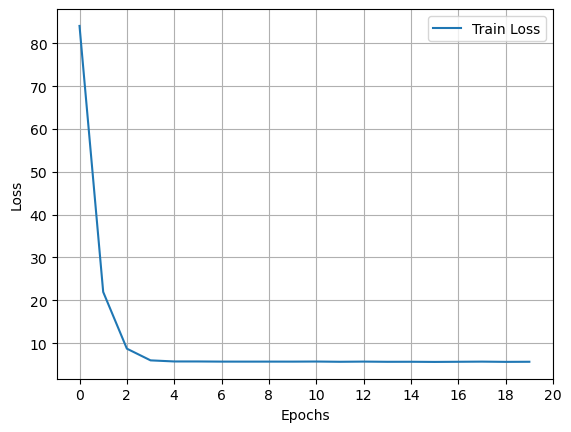

In [17]:
def create_plt_loss(history, x_tick_min = int, x_tick_max = int, x_tick_step = int):
    """
    Create a plot for the loss of the model

    Input : 
    - history : history of the model  
    - x_ticks : list of integers for the x-axis

    Output : 
    - Plot of the loss
    """
    plt.plot(history.history['loss'], label='Train Loss')
    plt.xticks(np.arange(x_tick_min, x_tick_max, 
                         step=x_tick_step))
    plt.grid(True)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    return plt.show()

create_plt_loss(history, x_tick_min = 0, 
                x_tick_max =  22, x_tick_step=2)

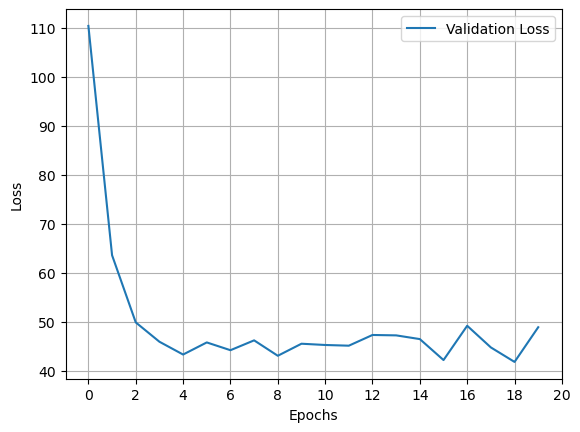

In [18]:
def create_plt_val_los(history, x_tick_min = int, x_tick_max = int, x_tick_step = int):
    """
    Create a plot for the loss of the model

    Input : 
    - history : history of the model  
    - x_ticks : list of integers for the x-axis

    Output : 
    - Plot of the loss
    """
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xticks(np.arange(x_tick_min, x_tick_max, 
                         step=x_tick_step))
    plt.grid(True)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    return plt.show()

    
create_plt_val_los(history, x_tick_min = 0,x_tick_max=22, x_tick_step=2)

In [19]:
# Beispiel für die Modellbewertung
test_loss = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)


4/4 [==============================] - 0s 971us/step - loss: 289.2796
Test Loss: 289.2795715332031


In [20]:
predictions = model.predict(X_test)
predictions.shape

4/4 [==============================] - 0s 536us/step


(98, 1)

In [21]:
y_test.shape, predictions.shape

((98,), (98, 1))

In [22]:
# Erstelle eine DataFrame für die wahren und vorhergesagten Werte
results_df = pd.DataFrame({
    'True Values': y_test.values.flatten(),
    'Predicted Values': predictions.flatten()
})
results_df

,True Values,Predicted Values
0,18.23,8.638962
1,18.27,7.405457
2,18.33,7.007166
3,18.39,6.589721
4,18.42,9.632661
...,...,...
93,35.42,9.586279
94,36.84,8.321461
95,41.32,8.453431
96,47.22,9.771808


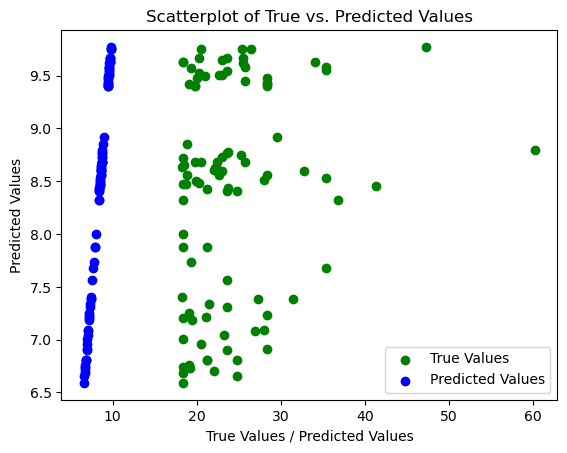

In [23]:
import matplotlib.pyplot as plt

# Scatterplot für "True Values" in Grün
plt.scatter(results_df["True Values"], results_df["Predicted Values"], color='green', label='True Values')

# Scatterplot für "Predicted Values" in Blau
plt.scatter(results_df["Predicted Values"], results_df["Predicted Values"], color='blue', label='Predicted Values')

plt.xlabel('True Values / Predicted Values')
plt.ylabel('Predicted Values')
plt.title('Scatterplot of True vs. Predicted Values')
plt.legend()
plt.show()


# Ende Model 1

In [ ]:
model = Sequential([
    InputLayer(input_shape=X_train.shape[-1], name="Input"),
    Dense(5, activation="relu", name="layer1"),
    Dense(5, name="layer2"),
    Dense(1, name="Output"),
])

# Model 2 

2 Model: LSTM

In [24]:
# Model infrastructure
model_2 = Sequential([
    InputLayer(input_shape=(X_train.shape[1], 1), name='Input'),
    LSTM(units=2, return_sequences=True, activation="relu", name='layer1'),
    LSTM(units=2, return_sequences=False, activation="relu", name='layer2'),
    Dense(units=1, name='Output')
])

    

In [25]:
model_2.compile(optimizer='adam', loss='mean_squared_error')     
model_2.summary() 

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (LSTM)               (None, 2, 2)              32        
                                                                 
 layer2 (LSTM)               (None, 2)                 40        
                                                                 
 Output (Dense)              (None, 1)                 3         
                                                                 
Total params: 75
Trainable params: 75
Non-trainable params: 0
_________________________________________________________________


In [26]:
history_2 = model_2.fit(X_train, y_train, epochs=20, batch_size=1, validation_data=(X_valid, y_valid))
history_2

Epoch 1/20
700/700 [==============================] - 1s 987us/step - loss: 23.4759 - val_loss: 58.6540
Epoch 2/20
700/700 [==============================] - 1s 847us/step - loss: 5.9147 - val_loss: 52.4876
Epoch 3/20
700/700 [==============================] - 1s 786us/step - loss: 5.7604 - val_loss: 45.9874
Epoch 4/20
700/700 [==============================] - 1s 781us/step - loss: 5.7401 - val_loss: 50.1882
Epoch 5/20
700/700 [==============================] - 1s 782us/step - loss: 5.7328 - val_loss: 54.6797
Epoch 6/20
700/700 [==============================] - 1s 784us/step - loss: 5.6516 - val_loss: 61.2073
Epoch 7/20
700/700 [==============================] - 1s 783us/step - loss: 5.6439 - val_loss: 48.0706
Epoch 8/20
700/700 [==============================] - 1s 785us/step - loss: 5.6861 - val_loss: 43.6246
Epoch 9/20
700/700 [==============================] - 1s 783us/step - loss: 5.6817 - val_loss: 51.9405
Epoch 10/20
700/700 [==============================] - 1s 801us/step - l

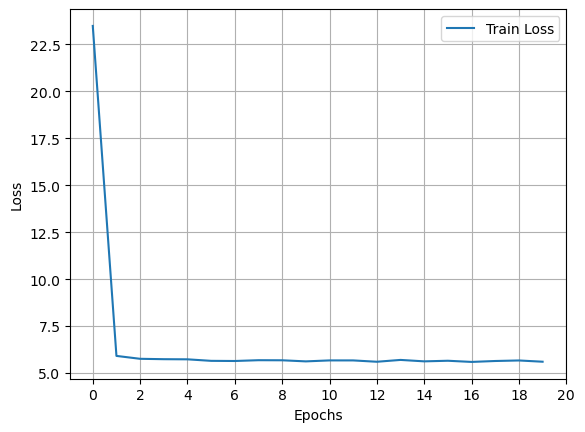

In [27]:
create_plt_loss(history_2, x_tick_min = 0,x_tick_max=22, x_tick_step=2)

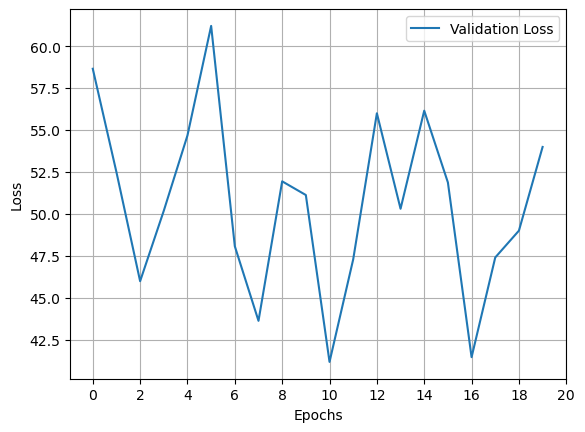

In [28]:
create_plt_val_los(history_2, x_tick_min = 0,x_tick_max=22, x_tick_step=2)  

In [29]:
test_loss_2 = model_2.evaluate(X_test, y_test)
print("Test Loss of Model 1:", test_loss)
print("Test Loss of Model 2:", test_loss_2)

4/4 [==============================] - 0s 879us/step - loss: 312.7241
Test Loss of Model 1: 289.2795715332031
Test Loss of Model 2: 312.72412109375


In [30]:
predictions_2 = model_2.predict(X_test)
predictions_2.shape

4/4 [==============================] - 0s 921us/step


(98, 1)

In [31]:
# Erstelle eine DataFrame für die wahren und vorhergesagten Werte
results_df_2 = pd.DataFrame({
    'True Values': y_test.values.flatten(),
    'Predicted Values': predictions_2.flatten()
})
results_df_2

,True Values,Predicted Values
0,18.23,8.006612
1,18.27,6.700983
2,18.33,6.740997
3,18.39,6.689134
4,18.42,8.338767
...,...,...
93,35.42,8.343764
94,36.84,7.442199
95,41.32,7.558945
96,47.22,8.151640


In [32]:
results_df_2.columns

Index(['True Values', 'Predicted Values'], dtype='object')

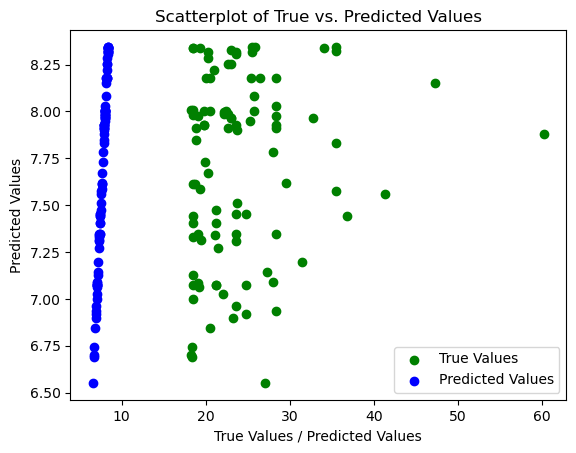

In [33]:
import matplotlib.pyplot as plt

# Scatterplot für "True Values" in Grün
plt.scatter(results_df_2["True Values"], results_df_2["Predicted Values"], color='green', label='True Values')

# Scatterplot für "Predicted Values" in Blau
plt.scatter(results_df_2["Predicted Values"], results_df_2["Predicted Values"], color='blue', label='Predicted Values')

plt.xlabel('True Values / Predicted Values')
plt.ylabel('Predicted Values')
plt.title('Scatterplot of True vs. Predicted Values')
plt.legend()
plt.show()


# Model 3

In [39]:
model_3 = keras.models.Sequential([ 
    keras.layers.SimpleRNN(2, return_sequences=True, input_shape=(X_train.shape[1], 1), activation="relu", name="Input"),
    keras.layers.SimpleRNN(20, return_sequences=True, activation="relu", name="layer1"),
    keras.layers.SimpleRNN(3, return_sequences=False, activation="relu", name="layer2"),
    keras.layers.Dense(1, name='Output')
])
model_3.compile(loss="mean_squared_error", optimizer="adam")  
model_3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (SimpleRNN)           (None, 2, 2)              8         
                                                                 
 layer1 (SimpleRNN)          (None, 2, 20)             460       
                                                                 
 layer2 (SimpleRNN)          (None, 3)                 72        
                                                                 
 Output (Dense)              (None, 1)                 4         
                                                                 
Total params: 544
Trainable params: 544
Non-trainable params: 0
_________________________________________________________________


In [40]:
model_3.compile(loss="mean_squared_error", optimizer="adam")   
model_3.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid)) 

Epoch 1/10
22/22 [==============================] - 1s 9ms/step - loss: 68.6018 - val_loss: 157.6342
Epoch 2/10
22/22 [==============================] - 0s 2ms/step - loss: 21.9606 - val_loss: 103.0320
Epoch 3/10
22/22 [==============================] - 0s 2ms/step - loss: 13.2839 - val_loss: 78.3781
Epoch 4/10
22/22 [==============================] - 0s 2ms/step - loss: 8.9712 - val_loss: 60.1580
Epoch 5/10
22/22 [==============================] - 0s 2ms/step - loss: 7.4504 - val_loss: 50.6184
Epoch 6/10
22/22 [==============================] - 0s 2ms/step - loss: 7.1446 - val_loss: 48.0989
Epoch 7/10
22/22 [==============================] - 0s 2ms/step - loss: 7.0299 - val_loss: 47.8856
Epoch 8/10
22/22 [==============================] - 0s 2ms/step - loss: 6.9232 - val_loss: 48.1561
Epoch 9/10
22/22 [==============================] - 0s 2ms/step - loss: 6.8237 - val_loss: 47.9809
Epoch 10/10
22/22 [==============================] - 0s 2ms/step - loss: 6.7214 - val_loss: 47.6441
